# Logistic Regression with sklearn
Usage of Logistic Regression.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

## 1.Import Japanese Forest Dataset

In [30]:
# importing the Forest Dataset
df = pd.read_csv('../forest_dataset.csv') #Dataframe for training.csv

#Extract the training targets
y_df = df[['class']]
y=y_df.values
y=y.reshape(-1)
print(type(y),"y:",y.shape)
#print(y)

#Extract the training data
df.drop(['class'],1,inplace=True)
X = df.values

print(type(X),"X:",X.shape)
#print(X)

<class 'numpy.ndarray'> y: (523,)
<class 'numpy.ndarray'> X: (523, 27)


In [31]:
#Split Dataset into Trainset and Testset 
#80 % for training and 20% for testting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


## 2. Obtain train/test accuracy

83
Max accuracy obtained: 0.9142857142857143 , with c = 83


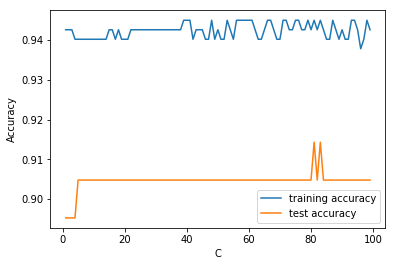

In [33]:
# Obtain the accuracy of train/test process varying the parameter C
%matplotlib inline

#Initialize the lists
training_accuracy = []
test_accuracy = []
test_accuracy2 = []

rango = np.arange(1, 100, 1)
for c in rango:
    # builds the classification model    
    clf = LogisticRegression(C=c)
    clf.fit(X_train, y_train)
    # save the "training set accuracy"
    training_accuracy.append(clf.score(X_train, y_train))
    # save the "generalization accuracy"
    test_accuracy2.append([clf.score(X_test, y_test),c])
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(rango, training_accuracy, label="training accuracy")
plt.plot(rango, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()

best_c=max(test_accuracy2)[1]
print(best_c)
print("Max accuracy obtained:", max(test_accuracy),", with c =",best_c)

## 3. Create plotting function for Cross-validation & Training Score

In [34]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):   
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

## 4. Obtain Cross-validation & Training Score 

<module 'matplotlib.pyplot' from 'C:\\Users\\gollo\\Miniconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

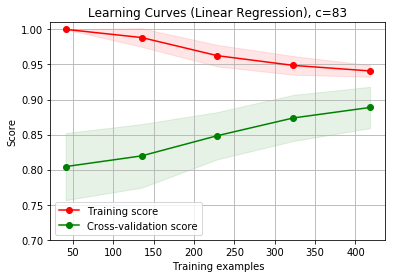

In [35]:
# Obtain the cross-validation and training accuracy with the best parameter C found 
title = "Learning Curves (Linear Regression), c=" + str(best_c)
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator =LogisticRegression(C=best_c)
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4) 

For more information about Logistic Regression, visit the following webpage: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html